## 感知机

感知机是作为神经网络（深度学习）的起源算法。感知机应该称为“人工神经元”或“朴素感知机”。
感知机接收多个输入信号，输出一个信号。这里说的“信号”可以想象成电流或河流那样具备“流动性”的东西。像电流流过导线，向前方输送电子一样，感知机信号也会形成流，向前方输送信息。但是，和实际电流不同的是，感知机信号只有“流”和“不流”（1/0）两种取值。
- 0对应“不传递信号”
- 1对应“传递信号”

$x_1$、$x_2$ 是输入信号，$y$ 是输出信号， $w_1$、$w_2$ 是权重（weight 的首字母）。图中的 $\bigcirc$ 称为“神经元”或者“节点”。

输入信号被送往神经元时，会被分别乘以固定的权重（$w_1x_1$、$w_2x_2$）。神经元会计算传送过来的信号的总和，只有当这个总和超过了某个界限值时，才会输出1。这也被称为“神经元被激活”。这里将这个界限值称为**阈值**，用符号 $\theta$ 表示。

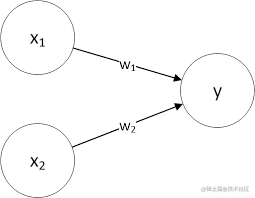

> 📘 Info
> 
> 感知机模拟的是人的神经元，该神经元其实也是一种控制机制，即判断两个信号乘以权重之和。

用数学式来表示，就是：
$y=\left\{\begin{array}{l}0\;(\omega_1x_1+\omega_2x_2\leqslant\theta)\\1\;(\omega_1x_1+\omega_2x_2>\theta)\end{array}\right.$

感知机的多个输入信号都有各自固有的权重，这些权重发挥着控制各个信号的重要性的作用。也就是说，权重越大，对应该权重的信号的重要性就越高。

> 权重相当于电流里说的电阻。电阻是决定电流流动难度的参数，电阻越低，通过的电流就越大。而感知机的权重则是值越大，通过的信号就越大。不管是电阻还是权重，在控制信号流动难度（或者流动容易度）这一点上的作用都是一样的。

### 1. 用感知机搭建简单逻辑电路

#### 1.1 与门

与门有两个输入和一个输出的门电路（AND gate）。这个门电路和微电子电路中的门电路的功能是一样的。

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 +x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(AND(0, 0))  # 输出 0
print(AND(1, 0))  # 输出 0
print(AND(0, 1))  # 输出 0
print(AND(1, 1))  # 输出 1

0
0
0
1


#### 1.2 与非门

与非门（NAND gate）。与非门就是颠倒了与门的输出。

In [1]:
def NAND(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 +x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(NAND(0, 0))  # 输出 1
print(NAND(1, 0))  # 输出 1
print(NAND(0, 1))  # 输出 1
print(NAND(1, 1))  # 输出 0

1
1
1
0


### 2. 导入权重和偏置

转换一种表达形式：即将之前数学表达式中的 $\theta$ 换成 $-b$ ，于是就可以用以下式子来表示感知机的行为：

$y=\left\{\begin{array}{l}0\;(b+\omega_1x_1+\omega_2x_2\leqslant0)\\1\;(b+\omega_1x_1+\omega_2x_2>0)\end{array}\right.$

在这个等式中的 $b$ 称为偏置， $\omega_1$ 和 $\omega_2$ 称为**权重**。

变成这种表达形式之后，方便使用 NumPy 来对多个神经元进行矩阵计算。（这也是一种转换，变换的思想）

感知机会计算输入信号和权重的乘积，然后加上偏置，如果这个值大于0则输出1，否则输出0。


In [2]:
import numpy as np

x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

print(x)
print(w)

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)


[0 1]
[0.5 0.5]
[0.  0.5]
0.5
-0.19999999999999996


#### 2.1 利用偏置和权重实现逻辑门

##### 2.1.1 与门

In [3]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7

    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0, 0))  # 输出 0
print(AND(1, 0))  # 输出 0
print(AND(0, 1))  # 输出 0
print(AND(1, 1))  # 输出 1

0
0
0
1


##### 2.1.2 与非门和或门

In [4]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7

    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2

    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1

print("NAND")
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))
print("-------------")
print("OR")
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))



NAND
1
1
1
0
-------------
OR
0
1
1
1


### 3. 感知机的局限性

学到这里，我们知道，感知机可以实现与门、与非门、或门三种逻辑电路。现在我们来考虑一下异或门（XOR gate）

#### 3.1 异或门

异或门也称为**逻辑异或**电路。只有在输入不同的时候，才会输出1。而输如相同的时候输出0。

实际上，前面的感知机无法实现这个异或门。我们用画图来思考其中的原因。（使用了数形结合的方式表达了逻辑思维）

对于数学式：

$y=\left\{\begin{array}{l}0\;(-0.5+\omega_1x_1+\omega_2x_2\leqslant0)\\1\;(-0.5+\omega_1x_1+\omega_2x_2>0)\end{array}\right.$

感知机会生成由直线 $-0.5+x_1+x_2=0$ 分隔开的两个空间。其中一个空间输出1，另一个空间输出0，如下图所示：

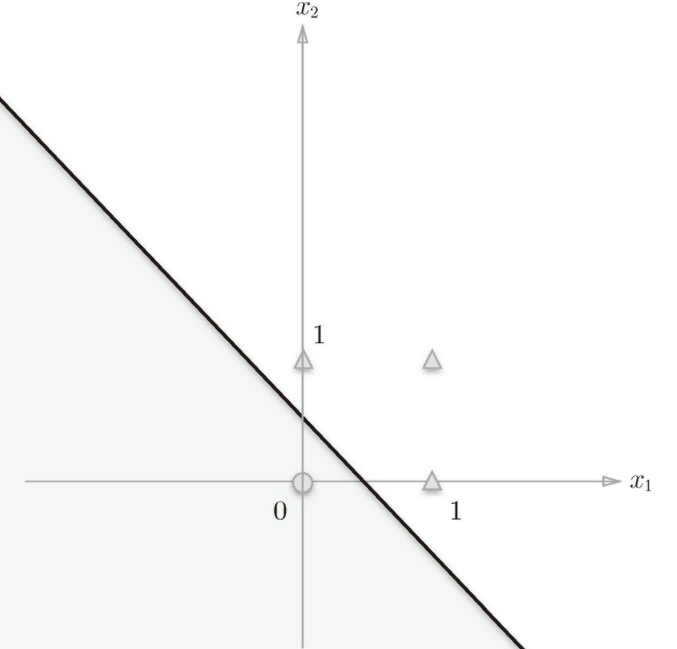



### 4. 多层感知机

通过多个不同门电路的叠加，就能够实现异或门。

![截屏2024-06-11 下午1.49.34.png](<attachment:截屏2024-06-11 下午1.49.34.png>)

代码实现：
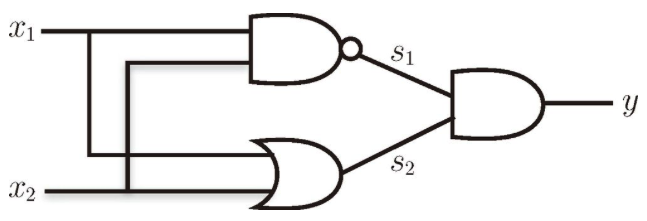

In [5]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0
